#Myntra fashion Sales Data Analysis

In [ ]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162732 sha256=9e670f32a015f84f28bc1438dcc9c739e9dc617cc3c9847fe7a35a1b508dbb9f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [91]:
data = pd.read_csv('/content/Myntra Fasion Clothing.csv')

In [93]:
data1 = data.copy()

#Data Exploration and Preprocessing

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  333406 non-null  float64
 8   OriginalPrice (in Rs)  526564 non-null  float64
 9   DiscountOffer          452258 non-null  object 
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ MB


In [81]:
data.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [82]:
data.sample(5)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
330264,https://www.myntra.com/sarees/saadhvi/saadhvi-...,17746160,SAADHVI,Indian Wear,sarees,Women,saadhvi turquoise blue gold toned zari pure c...,381.0,2245.0,83% OFF,Onesize,NaN,NaN
221975,https://www.myntra.com/kurtas/manthan/manthan-...,17650690,Manthan,Indian Wear,kurtas,Men,manthan men navy blue self design kurta,NaN,1299.0,NaN,"S, M, L, XL, XXL",NaN,NaN
201842,https://www.myntra.com/jeans/pepe-jeans/pepe-j...,17335286,Pepe Jeans,Bottom Wear,jeans,Men,pepe jeans men blue slim fit heavy fade stretc...,2879.0,3599.0,20% OFF,"28, 30, 32, 34, 36, 38, 40",NaN,NaN
358815,https://www.myntra.com/sarees/saadhvi/saadhvi-...,18098046,SAADHVI,Indian Wear,sarees,Women,saadhvi turquoise blue white set of 2 pure ge...,679.0,3395.0,80% OFF,Onesize,NaN,NaN
103734,https://www.myntra.com/dresses/quiero/quiero-w...,15105062,QUIERO,Western,dresses,Women,quiero women pretty pink solid sweetheart neck...,NaN,2469.0,70% OFF,"XS, S, M, L",4.1,16.0


In [83]:
data.shape

(526564, 13)

In [84]:
data.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews'],
      dtype='object')

In [85]:
data.describe()

,Product_id,DiscountPrice (in Rs),OriginalPrice (in Rs),Ratings,Reviews
count,5.265640e+05,333406.000000,526564.000000,190412.000000,190412.000000
mean,1.506939e+07,1237.444401,2414.068615,4.094892,61.990820
std,3.225710e+06,1052.063517,1916.962914,0.494158,125.714537
min,2.739900e+04,127.000000,99.000000,1.000000,0.000000
25%,1.388053e+07,659.000000,1299.000000,3.900000,8.000000
50%,1.597106e+07,952.000000,1999.000000,4.200000,18.000000
75%,1.734741e+07,1469.000000,2899.000000,4.400000,52.000000
max,1.846435e+07,27996.000000,90000.000000,5.000000,999.000000


In [86]:
data.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

#Filling the missing value and drop columns

In [87]:
data.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews'],
      dtype='object')

In [88]:
# Fill missing values in Product_id with a placeholder value (e.g., -1)
data['Product_id'].fillna(-1, inplace=True)

# Fill missing values in BrandName, Category, Individual_category, category_by_Gender, and Description with 'Unknown'
data['BrandName'].fillna('Unknown', inplace=True)
data['Category'].fillna('Unknown', inplace=True)
data['Individual_category'].fillna('Unknown', inplace=True)
data['category_by_Gender'].fillna('Unknown', inplace=True)
data['Description'].fillna('Unknown', inplace=True)

# Fill missing values in DiscountPrice with 0
data['DiscountPrice (in Rs)'].fillna(0, inplace=True)

# Fill missing values in DiscountOffer with 'No Discount'
data['DiscountOffer'].fillna('No Discount', inplace=True)

# Fill missing values in SizeOption with 'Not Specified'
data['SizeOption'].fillna('Not Specified', inplace=True)

# Fill missing values in Ratings and Reviews with the mean value
mean_ratings = data['Ratings'].mean()
data['Ratings'].fillna(mean_ratings, inplace=True)
mean_reviews = data['Reviews'].mean()
data['Reviews'].fillna(mean_reviews, inplace=True)

# Check for missing values after handling
missing_values_count = data.isnull().sum()
print("Remaining missing values count:\n", missing_values_count)


Remaining missing values count:
 URL                      0
Product_id               0
BrandName                0
Category                 0
Individual_category      0
category_by_Gender       0
Description              0
DiscountPrice (in Rs)    0
OriginalPrice (in Rs)    0
DiscountOffer            0
SizeOption               0
Ratings                  0
Reviews                  0
dtype: int64


In [89]:
# Define the path where you want to save the Excel file
excel_file_path = "/content/preprocessed_data.xlsx"

# Save the DataFrame to an Excel file
data.to_excel(excel_file_path, index=False)

# Download the Excel file from Colab
from google.colab import files
files.download(excel_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

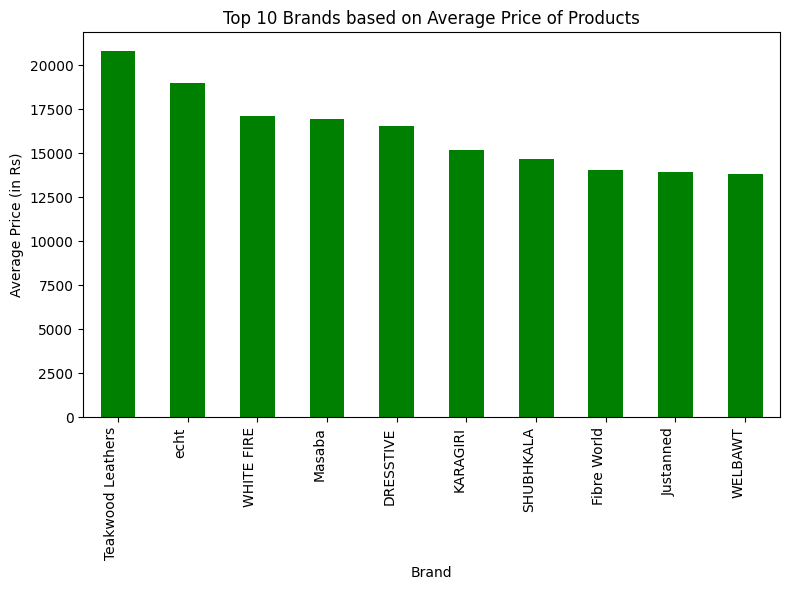

In [90]:
# Assuming you have a DataFrame named 'df' containing your data
top_10_brands_price_based = data.groupby('BrandName')['OriginalPrice (in Rs)'].mean().nlargest(10)

# Plotting the top 10 brands based on average price
plt.figure(figsize=(8, 6))
top_10_brands_price_based.plot(kind='bar', color='green')
plt.title('Top 10 Brands based on Average Price of Products')
plt.xlabel('Brand')
plt.ylabel('Average Price (in Rs)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


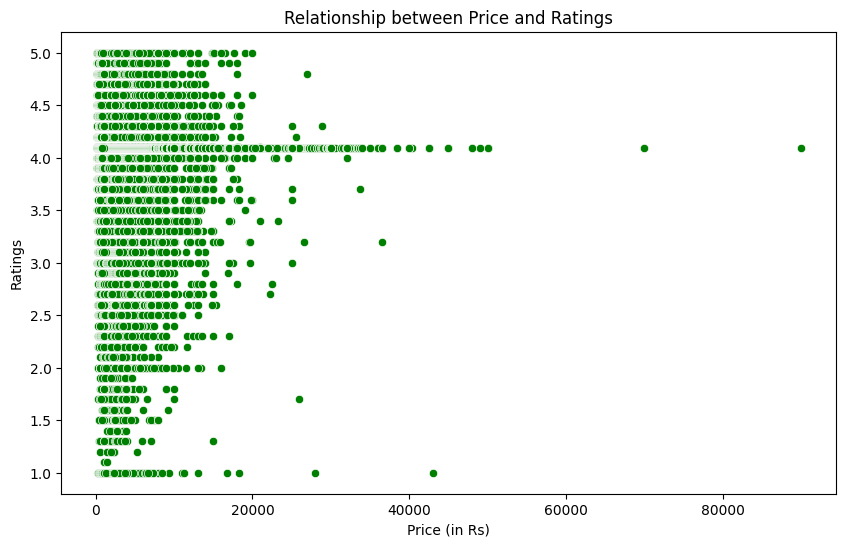

In [8]:
# Relationship between price and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OriginalPrice (in Rs)', y='Ratings', data=data, color='green')
plt.title('Relationship between Price and Ratings')
plt.xlabel('Price (in Rs)')
plt.ylabel('Ratings')
plt.show()

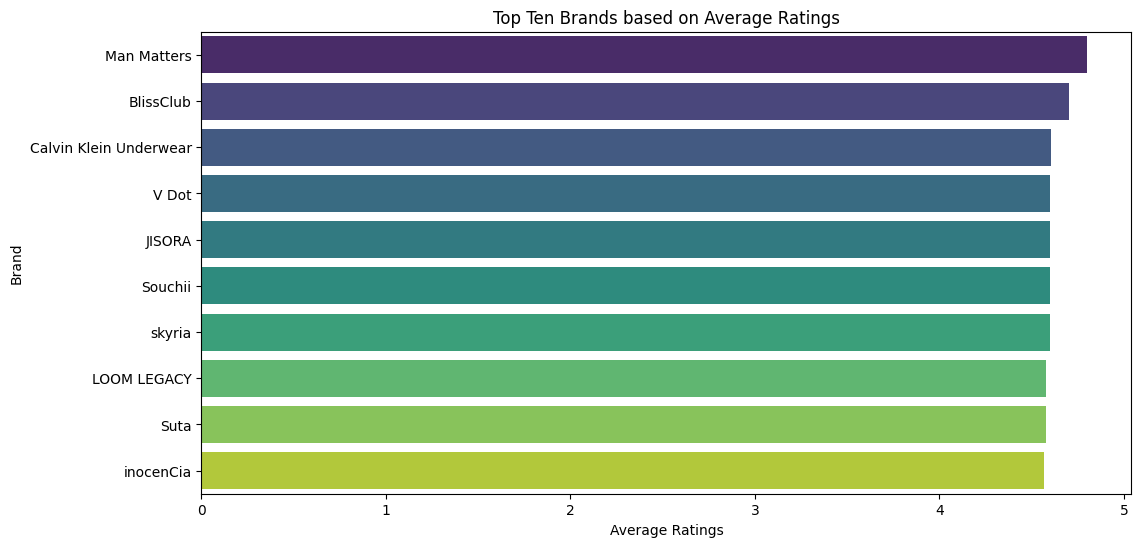

In [ ]:
# Calculate the average ratings for each brand
average_ratings_by_brand = data.groupby('BrandName')['Ratings'].mean()

# Sort brands based on average ratings and select the top ten
top_ten_brands_ratings_based = average_ratings_by_brand.nlargest(10)

# Plot the top ten brands based on average ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ten_brands_ratings_based.values, y=top_ten_brands_ratings_based.index, palette='viridis')
plt.xlabel('Average Ratings')
plt.ylabel('Brand')
plt.title('Top Ten Brands based on Average Ratings')
plt.show()


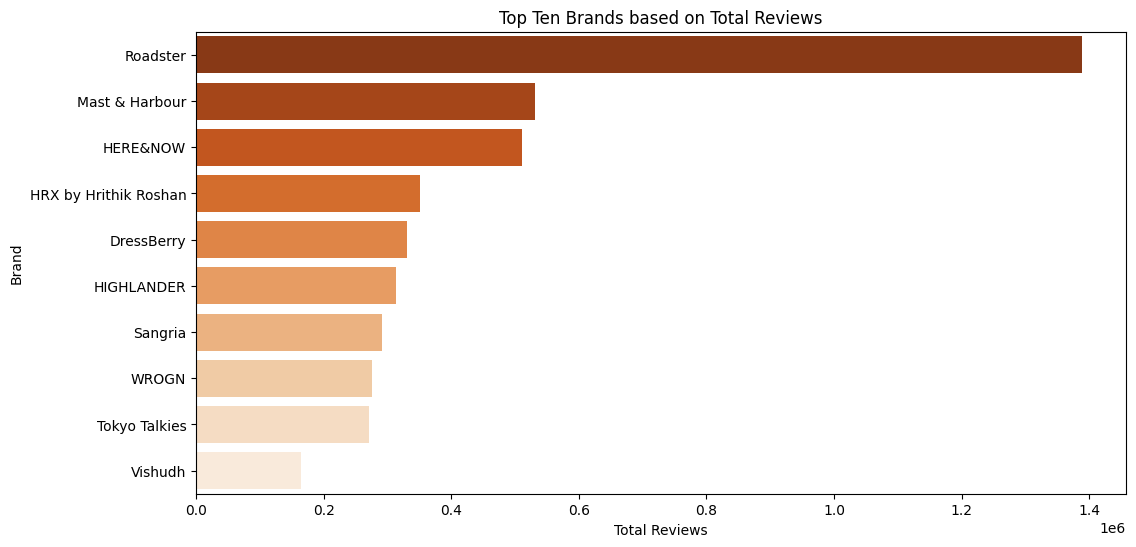

In [ ]:
# Calculate the total reviews for each brand
total_reviews_by_brand = data.groupby('BrandName')['Reviews'].sum()

# Sort brands based on total reviews and select the top ten
top_ten_brands_reviews_based = total_reviews_by_brand.nlargest(10)

# Plot the top ten brands based on total reviews
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ten_brands_reviews_based.values, y=top_ten_brands_reviews_based.index, palette='Oranges_r')
plt.xlabel('Total Reviews')
plt.ylabel('Brand')
plt.title('Top Ten Brands based on Total Reviews')
plt.show()


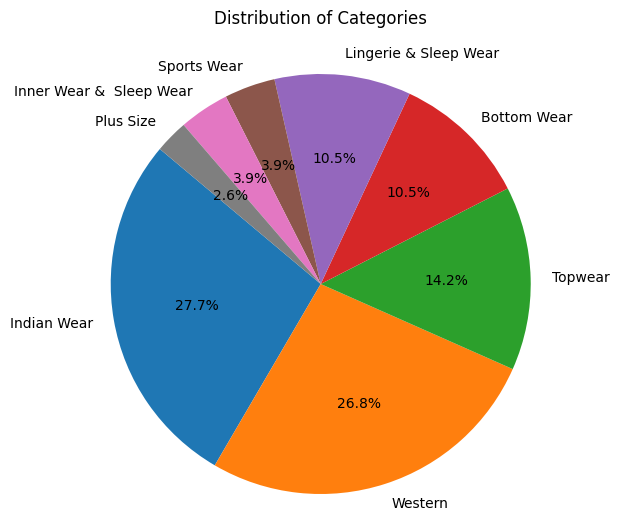

In [9]:
# Count the occurrences of each category
category_counts = data['Category'].value_counts()

# Plot a pie chart for the distribution of categories
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


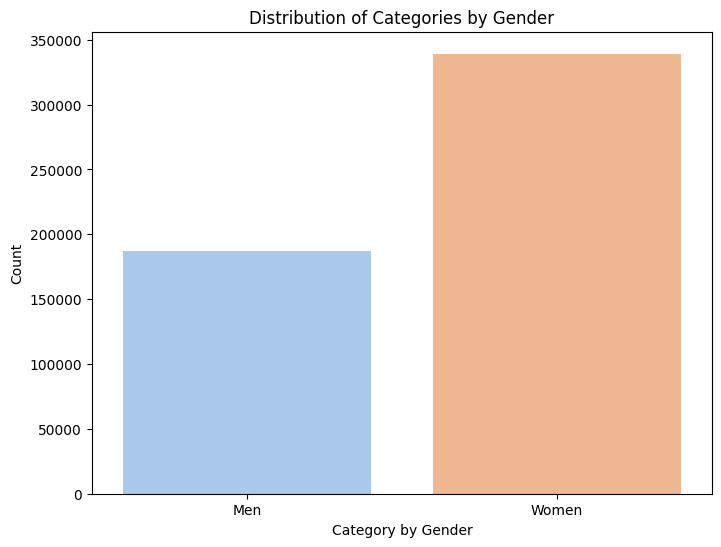

In [11]:
import seaborn as sns

# Plot a count plot for the distribution of categories by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='category_by_Gender', data=data, palette='pastel')
plt.title('Distribution of Categories by Gender')
plt.xlabel('Category by Gender')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()


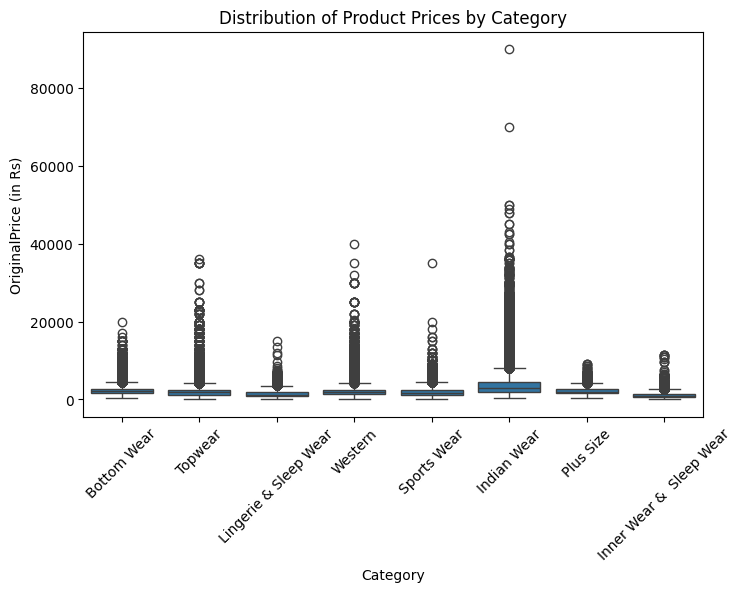

In [16]:
# Distribution of product prices across different categories and brands
plt.figure(figsize=(8, 5))
sns.boxplot(x='Category', y='OriginalPrice (in Rs)', data=data)
plt.title('Distribution of Product Prices by Category')
plt.xticks(rotation=45)
plt.show()

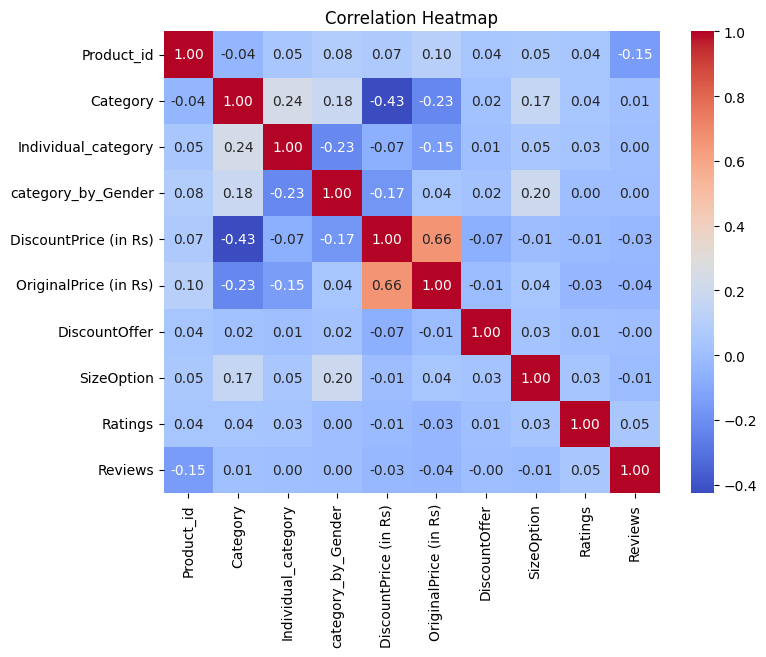

In [18]:
# Encode categorical variables if needed
encoded_data = data.copy()
encoded_data['Category'] = encoded_data['Category'].astype('category').cat.codes
encoded_data['Individual_category'] = encoded_data['Individual_category'].astype('category').cat.codes
encoded_data['category_by_Gender'] = encoded_data['category_by_Gender'].astype('category').cat.codes
encoded_data['SizeOption'] = encoded_data['SizeOption'].astype('category').cat.codes
encoded_data['DiscountOffer'] = encoded_data['DiscountOffer'].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = encoded_data.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


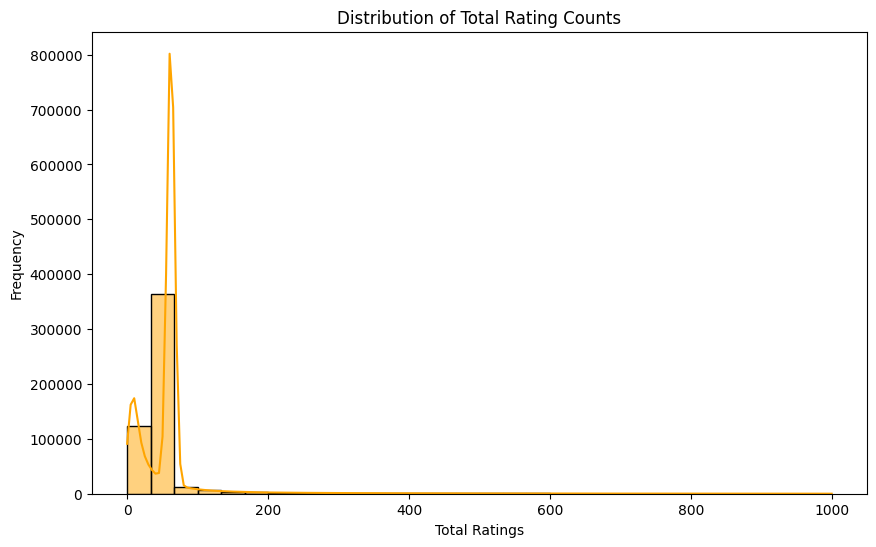

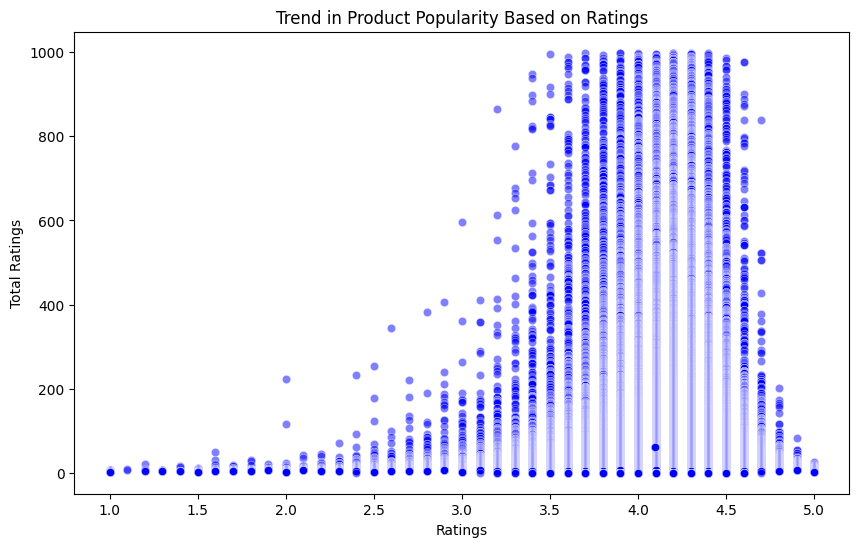

In [19]:
# Goal 2: Identify trends in product popularity based on ratings and total rating counts

# Distribution of total rating counts
plt.figure(figsize=(10, 6))
sns.histplot(data['Reviews'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Rating Counts')
plt.xlabel('Total Ratings')
plt.ylabel('Frequency')
plt.show()

# Trend in product popularity based on ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ratings', y='Reviews', data=data, color='blue', alpha=0.5)
plt.title('Trend in Product Popularity Based on Ratings')
plt.xlabel('Ratings')
plt.ylabel('Total Ratings')
plt.show()


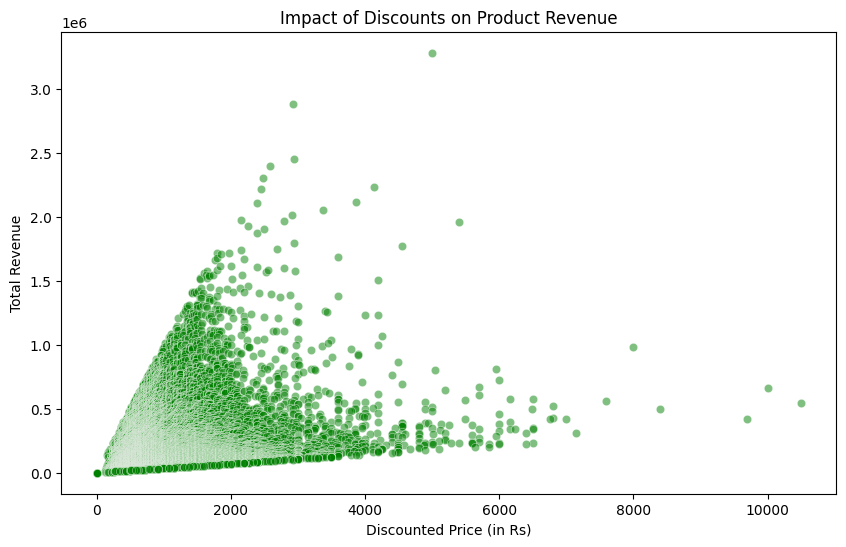

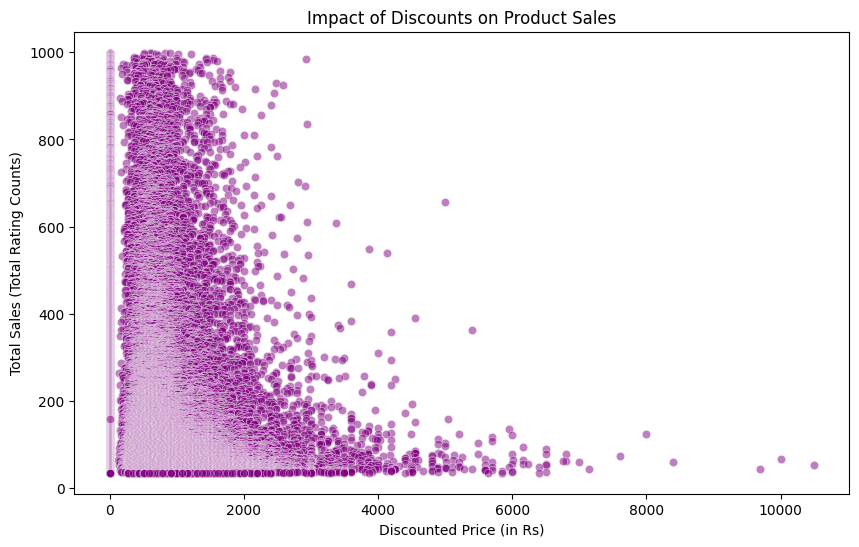

In [ ]:
# Goal 3: Analyze the impact of discounts on product sales and revenue

# Calculate the total revenue for each product (considering discounted prices)
data['TotalRevenue'] = data['DiscountPrice (in Rs)'] * data['Reviews']

# Plot the relationship between discounts and total revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DiscountPrice (in Rs)', y='TotalRevenue', data=data, color='green', alpha=0.5)
plt.title('Impact of Discounts on Product Revenue')
plt.xlabel('Discounted Price (in Rs)')
plt.ylabel('Total Revenue')
plt.show()

# Plot the relationship between discounts and total sales (total rating counts)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DiscountPrice (in Rs)', y='Reviews', data=data, color='purple', alpha=0.5)
plt.title('Impact of Discounts on Product Sales')
plt.xlabel('Discounted Price (in Rs)')
plt.ylabel('Total Sales (Total Rating Counts)')
plt.show()


In [55]:
# Install the Surprise library
# !pip install scikit-surprise

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate, train_test_split

# Load the dataset
reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(data[['Product_id', 'Reviews', 'Ratings']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

# Use Singular Value Decomposition (SVD) algorithm for recommendation
model = SVD()
model.fit(trainset)

# Generate predictions for the test set
predictions = model.test(testset)

# Evaluate the model
from surprise import accuracy
accuracy.rmse(predictions)

# Make recommendations for a specific user
user_id = 123  # Example user ID
user_items = data[data['Product_id'] == user_id]['Product_id'].values.tolist()
user_unseen_items = [item for item in data['Product_id'].unique() if item not in user_items]

# Predict ratings for unseen items
user_ratings = [(user_id, item_id, model.predict(user_id, item_id).est) for item_id in user_unseen_items]

# Sort the recommendations by predicted ratings
sorted_recommendations = sorted(user_ratings, key=lambda x: x[2], reverse=True)

# Get top N recommendations
top_n = 10
top_recommendations = sorted_recommendations[:top_n]

# Print the top N recommendations
print(f"Top {top_n} Recommendations for User {user_id}:")
for item in top_recommendations:
    print(f"Product ID: {item[1]}, Predicted Rating: {item[2]}")


RMSE: 0.2888
Top 10 Recommendations for User 123:
Product ID: 2296012, Predicted Rating: 4.0947844699524225
Product ID: 13780156, Predicted Rating: 4.0947844699524225
Product ID: 11895958, Predicted Rating: 4.0947844699524225
Product ID: 4335679, Predicted Rating: 4.0947844699524225
Product ID: 11690882, Predicted Rating: 4.0947844699524225
Product ID: 2490950, Predicted Rating: 4.0947844699524225
Product ID: 6744434, Predicted Rating: 4.0947844699524225
Product ID: 8439415, Predicted Rating: 4.0947844699524225
Product ID: 17381394, Predicted Rating: 4.0947844699524225
Product ID: 2359257, Predicted Rating: 4.0947844699524225


In [22]:
data1[data1['DiscountPrice (in Rs)'].isnull()][:3]

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0
5,https://www.myntra.com/tops/mast--harbour/mast...,2490950,Mast & Harbour,Western,tops,Women,mast harbour women yellow solid tank top,NaN,599.0,40% OFF,"XS, S, M, L, XL",4.4,999.0
7,https://www.myntra.com/tops/mayra/mayra-pink-e...,8439415,Mayra,Western,tops,Women,mayra pink embroidered a line pure cotton top,NaN,1395.0,58% OFF,"S, M, L, XL",3.7,998.0


In [23]:
# Separating The Null Value Data And Normal Data
data_DP_null = data1[data1['DiscountPrice (in Rs)'].isnull()]
data_DP = data1[data1['DiscountPrice (in Rs)'].notnull()]
print(data1.shape,data_DP.shape,data_DP_null.shape)

(526564, 13) (333406, 13) (193158, 13)


In [73]:
data_DP_null.dtypes

URL                       object
Product_id                 int64
BrandName                 object
Category                  object
Individual_category       object
category_by_Gender        object
Description               object
DiscountPrice (in Rs)    float64
OriginalPrice (in Rs)    float64
DiscountOffer             object
SizeOption                object
Ratings                  float64
Reviews                  float64
dtype: object

In [74]:
data_DP_null.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74122
SizeOption                    0
Ratings                  120311
Reviews                  120311
dtype: int64

# Data Cleaning and Preprocessing for Discount Price

In [24]:
data_DP_null['DiscountOffer'] = data_DP_null['DiscountOffer'].fillna(0)
data_DP_null['DiscountOffer'] = data_DP_null['DiscountOffer'].astype(str)
print(data_DP_null['DiscountOffer'])

4         35% OFF
5         40% OFF
7         58% OFF
8               0
9               0
           ...   
526559          0
526560          0
526561          0
526562          0
526563          0
Name: DiscountOffer, Length: 193158, dtype: object


In [25]:
data_DP_null['DiscountOffer_len'] = data_DP_null['DiscountOffer'].apply(lambda x:len(x))
data_DP_null['DiscountOffer_len'].value_counts()

7     109474
1      74122
11      4018
12      2635
6       1855
9        896
10       158
Name: DiscountOffer_len, dtype: int64

In [26]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==1].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==6].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==7].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==9].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==10].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==11].iloc[0]['DiscountOffer'])
print(data_DP_null[data_DP_null['DiscountOffer_len']==12].iloc[0]['DiscountOffer'])

0
5% OFF
35% OFF
 45 % OFF
Rs. 38 OFF
Rs. 500 OFF
Rs. 1100 OFF


In [27]:
data1 = data_DP_null[data_DP_null['DiscountOffer_len']==1]
data6 = data_DP_null[data_DP_null['DiscountOffer_len']==6]
data7 = data_DP_null[data_DP_null['DiscountOffer_len']==7]
data9 = data_DP_null[data_DP_null['DiscountOffer_len']==9]
data10 = data_DP_null[data_DP_null['DiscountOffer_len']==10]
data11 = data_DP_null[data_DP_null['DiscountOffer_len']==11]
data12 = data_DP_null[data_DP_null['DiscountOffer_len']==12]

In [28]:
data1['Discount_Seg'] = data1['DiscountOffer'].apply(lambda x:x.split('%')[0])
data6['Discount_Seg'] = data6['DiscountOffer'].apply(lambda x:x.split('%')[0])
data7['Discount_Seg'] = data7['DiscountOffer'].apply(lambda x:x.split('%')[0])
data9['Discount_Seg'] = data9['DiscountOffer'].apply(lambda x:x.split('%')[0])
data10['Discount_Seg'] = data10['DiscountOffer'].apply(lambda x:(x.split('Rs.')[1]).split('OFF')[0])
data11['Discount_Seg'] = data11['DiscountOffer'].apply(lambda x:(x.split('Rs.')[1]).split('OFF')[0])
data12['Discount_Seg'] = data12['DiscountOffer'].apply(lambda x:(x.split('Rs.')[1]).split('OFF')[0])

In [29]:
data1['Discount_Seg'] = data1['Discount_Seg'].astype(float)
data6['Discount_Seg'] = data6['Discount_Seg'].astype(float)
data7['Discount_Seg'] = data7['Discount_Seg'].astype(float)
data9['Discount_Seg'] = data9['Discount_Seg'].astype(float)
data10['Discount_Seg'] = data10['Discount_Seg'].astype(float)
data11['Discount_Seg'] = data11['Discount_Seg'].astype(float)
data12['Discount_Seg'] = data12['Discount_Seg'].astype(float)

In [30]:
data1['discount_seg_price'] = data1['OriginalPrice (in Rs)']-data1['Discount_Seg']
data6['discount_seg_price'] = data6['OriginalPrice (in Rs)']-(data6['OriginalPrice (in Rs)']*data6['Discount_Seg']/100)
data7['discount_seg_price'] = data7['OriginalPrice (in Rs)']-(data7['OriginalPrice (in Rs)']*data7['Discount_Seg']/100)
data9['discount_seg_price'] = data9['OriginalPrice (in Rs)']-(data9['OriginalPrice (in Rs)']*data9['Discount_Seg']/100)
data10['discount_seg_price'] = data10['OriginalPrice (in Rs)']-data10['Discount_Seg']
data11['discount_seg_price'] = data11['OriginalPrice (in Rs)']-data11['Discount_Seg']
data12['discount_seg_price'] = data12['OriginalPrice (in Rs)']-data12['Discount_Seg']

In [31]:
print('Before',data_DP_null.shape)
data_DP_null =pd.concat([data1,data6,data7,data9,data10,data11,data12],axis=0)
print('After',data_DP_null.shape)

Before (193158, 14)
After (193158, 16)


In [32]:
data_DP_null.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer                 0
SizeOption                    0
Ratings                  120311
Reviews                  120311
DiscountOffer_len             0
Discount_Seg                  0
discount_seg_price            0
dtype: int64

In [33]:
data_DP_null[['DiscountPrice (in Rs)','OriginalPrice (in Rs)','DiscountOffer','discount_seg_price']]

,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,discount_seg_price
8,NaN,1098.0,0,1098.0
9,NaN,2749.0,0,2749.0
11,NaN,699.0,0,699.0
17,NaN,3999.0,0,3999.0
20,NaN,1298.0,0,1298.0
...,...,...,...,...
503949,NaN,7199.0,Rs. 4000 OFF,3199.0
503950,NaN,7199.0,Rs. 4900 OFF,2299.0
504004,NaN,7399.0,Rs. 5100 OFF,2299.0
504178,NaN,7599.0,Rs. 4200 OFF,3399.0


In [34]:
data_DP_null['Price_diff'] = data_DP_null['OriginalPrice (in Rs)'] - data_DP_null['discount_seg_price']
data_DP_null['discount_seg_%']= round(data_DP_null['Price_diff']*100/data_DP_null['OriginalPrice (in Rs)'])

In [35]:
data_DP_null.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews', 'DiscountOffer_len', 'Discount_Seg', 'discount_seg_price',
       'Price_diff', 'discount_seg_%'],
      dtype='object')

In [36]:
del data_DP_null['Price_diff']
del data_DP_null['DiscountOffer_len']
del data_DP_null['discount_seg_price']
del data_DP_null['Discount_Seg']

In [37]:
data_DP_null

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,discount_seg_%
8,https://www.myntra.com/tshirts/roadster/roadst...,17381394,Roadster,Western,tshirts,Women,roadster women pack of 2 solid t shirts,NaN,1098.0,0,"XS, S, M, L, XL",4.3,997.0,0.0
9,https://www.myntra.com/jeans/herenow/herenow-m...,2359257,HERE&NOW,Bottom Wear,jeans,Men,herenow men blue slim fit mid rise clean look ...,NaN,2749.0,0,"28, 30, 32, 34, 36",3.5,996.0,0.0
11,https://www.myntra.com/tshirts/roadster/roadst...,10307375,Roadster,Topwear,tshirts,Men,roadster men navy blue white striped polo col...,NaN,699.0,0,"XS, S, M, L, XL, XXL, 3XL, 4XL",4.1,996.0,0.0
17,https://www.myntra.com/kurta-sets/sangria/sang...,10561392,Sangria,Plus Size,kurta-sets,Women,sangria women green off white printed kurta w...,NaN,3999.0,0,"XS, S, M, L, XL, XXL, 3XL",4.3,995.0,0.0
20,https://www.myntra.com/tshirts/roadster/roadst...,17385142,Roadster,Western,tshirts,Women,roadster women pack of 2 printed cotton t shirt,NaN,1298.0,0,"XS, S, M, L, XL",4.4,994.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503949,https://www.myntra.com/dresses/fashor/fashor-b...,16989672,FASHOR,Western,dresses,Women,fashor black beige ethnic motifs embroidered ...,NaN,7199.0,Rs. 4000 OFF,"S, M, L, XL, XXL",NaN,NaN,56.0
503950,https://www.myntra.com/dresses/fashor/fashor-w...,17783562,FASHOR,Western,dresses,Women,fashor women green floral printed dress with d...,NaN,7199.0,Rs. 4900 OFF,"S, M, L, XL, XXL",NaN,NaN,68.0
504004,https://www.myntra.com/dresses/fashor/fashor-m...,16897510,FASHOR,Western,dresses,Women,fashor mustard red ethnic motifs ethnic maxi ...,NaN,7399.0,Rs. 5100 OFF,"M, L, XL, XXL, 3XL",NaN,NaN,69.0
504178,https://www.myntra.com/dresses/fashor/fashor-o...,17213218,FASHOR,Western,dresses,Women,fashor off white black a line midi dress,NaN,7599.0,Rs. 4200 OFF,"S, M, L, XL, XXL",NaN,NaN,55.0


In [38]:
data_DP['discount_seg_%'] = round(data_DP['DiscountPrice (in Rs)']*100/data_DP['OriginalPrice (in Rs)'])
data_DP

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,discount_seg_%
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0,55.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0,45.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0,45.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0,69.0
6,https://www.myntra.com/trousers/highlander/hig...,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.0,1499.0,60% OFF,"30, 32, 34, 36",3.9,998.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443936,https://www.myntra.com/tops/dechen/dechen-red-...,17353876,DECHEN,Western,tops,Women,dechen red white print top,464.0,1010.0,54% OFF,"S, M, L",NaN,NaN,46.0
443937,https://www.myntra.com/tops/dechen/dechen-whit...,17353938,DECHEN,Western,tops,Women,dechen white black polka dots print top,464.0,1010.0,54% OFF,"S, M, L",NaN,NaN,46.0
443938,https://www.myntra.com/tops/dechen/dechen-blac...,17353860,DECHEN,Western,tops,Women,dechen black white polka dots printed top,464.0,1010.0,54% OFF,"S, M, L",NaN,NaN,46.0
443939,https://www.myntra.com/tops/dechen/dechen-navy...,17353926,DECHEN,Western,tops,Women,dechen navy blue floral printed top with gathe...,464.0,1010.0,54% OFF,"S, M, L",NaN,NaN,46.0


In [39]:
data_DP['price_diff'] = data_DP['OriginalPrice (in Rs)']-data_DP['DiscountPrice (in Rs)']
data_DP['discount_seg_%'] = round(data_DP['price_diff']*100/data_DP['OriginalPrice (in Rs)'])

In [40]:
del data_DP['price_diff']

In [41]:
#Concatenating Cleaned Data and Normal Dataprint('After',data.shape)
data_new = pd.concat([data_DP,data_DP_null],axis=0)
print('Before',data_new.shape)

Before (526564, 14)


In [42]:
data_new.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews', 'discount_seg_%'],
      dtype='object')

In [44]:
data['DiscountOffer'] = data['DiscountOffer'].fillna(0)
data['DiscountOffer'] = data['DiscountOffer'].astype(str)
print(data['DiscountOffer'])

0             45% OFF
1             55% OFF
2             55% OFF
3             31% OFF
4             35% OFF
             ...     
526559    No Discount
526560    No Discount
526561    No Discount
526562    No Discount
526563    No Discount
Name: DiscountOffer, Length: 526564, dtype: object


In [45]:
#Handling Missing Values in the 'Ratings' and 'Reviews' Columns
data_new['Ratings'] = data_new['Ratings'].fillna(0)
data_new['Reviews'] = data_new['Reviews'].fillna(0)

In [47]:
# One-Hot Encoding of Gender Category in Data_new
data_new['gender'] = pd.get_dummies(data_new['category_by_Gender'],drop_first = True).values
data_new[['gender','category_by_Gender']]

,gender,category_by_Gender
0,0,Men
1,0,Men
2,0,Men
3,1,Women
6,0,Men
...,...,...
503949,1,Women
503950,1,Women
504004,1,Women
504178,1,Women


#Feature Engineering and Data Modelling

In [48]:
#Splitting Data into Data With Discount Value and Data With Nan and Zero Discount Value
model_data = data_new[data_new['discount_seg_%']!=0]
Non_Discount_data = data_new[data_new['discount_seg_%']==0]
print(model_data.shape)
print(Non_Discount_data.shape)

(452433, 15)
(74131, 15)


#Data Splitting into Training, Validation, and Testing Data

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = model_data.drop(['discount_seg_%'],axis=1)
y = model_data['discount_seg_%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True,stratify=model_data['discount_seg_%'])
X_train,X_val,y_train,y_val =train_test_split(X_train,y_train,test_size=0.33,random_state=42)

#Feature Creation On Training Data

In [51]:
check = X_train.groupby('BrandName')['Ratings'].mean().reset_index(name='rating')
print('Brand Have Ratings',check[check['rating']!=0].shape[0])
print('Brand do not Have Ratings',check[check['rating']==0].shape[0])

Brand Have Ratings 1318
Brand do not Have Ratings 432


In [52]:
check = X_train.groupby('BrandName')['Reviews'].mean().reset_index(name='review')
print('Brand Have Review',check[check['review']!=0].shape[0])
print('Brand do not Have Review',check[check['review']==0].shape[0])

Brand Have Review 1317
Brand do not Have Review 433


In [53]:
brand_impt = X_train.groupby('BrandName').agg({'Ratings':'mean','Reviews':'sum'}).reset_index()
brand_impt[:2]

,BrandName,Ratings,Reviews
0,1 Stop Fashion,0.037069,3.0
1,109F,1.710526,49.0


In [54]:
brand_impt['Brand_importance'] = brand_impt['Ratings']*brand_impt['Reviews']
brand_impt

,BrandName,Ratings,Reviews,Brand_importance
0,1 Stop Fashion,0.037069,3.0,0.111207
1,109F,1.710526,49.0,83.815789
2,20Dresses,1.010543,3522.0,3559.132907
3,39 THREADS,0.000000,0.0,0.000000
4,3PIN,0.210769,12.0,2.529231
...,...,...,...,...
1745,urSense,1.892857,56.0,106.000000
1746,urban undress,0.000000,0.0,0.000000
1747,wHAT'S DOwn,0.000000,0.0,0.000000
1748,wild U,0.505882,10.0,5.058824


In [55]:
print(X_train.shape)
X_train = X_train.merge(brand_impt[['BrandName','Brand_importance']],on='BrandName',how="left")
print(X_train.shape)

print(X_test.shape)
X_test = X_test.merge(brand_impt[['BrandName','Brand_importance']],on='BrandName',how="left")
print(X_test.shape)

print(X_val.shape)
X_val = X_val.merge(brand_impt[['BrandName','Brand_importance']],on='BrandName',how="left")
print(X_val.shape)

print(Non_Discount_data.shape)
Non_Discount_data = Non_Discount_data.merge(brand_impt[['BrandName','Brand_importance']],on='BrandName',how="left")
print(Non_Discount_data.shape)

(203097, 14)
(203097, 15)
(149303, 14)
(149303, 15)
(100033, 14)
(100033, 15)
(74131, 15)
(74131, 16)


In [56]:
individual_category_popularity = X_train.groupby('Individual_category')['BrandName'].nunique().reset_index(name='ind_cat_popularity')

In [57]:
print(X_train.shape)
X_train = X_train.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(X_train.shape)

print(X_test.shape)
X_test = X_test.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(X_test.shape)

print(X_val.shape)
X_val = X_val.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(X_val.shape)

print(Non_Discount_data.shape)
Non_Discount_data = Non_Discount_data.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(Non_Discount_data.shape)

(203097, 15)
(203097, 16)
(149303, 15)
(149303, 16)
(100033, 15)
(100033, 16)
(74131, 16)
(74131, 17)


In [58]:
category_popularity = X_train.groupby('Category')['Product_id'].count().reset_index(name='cat_popularity')

In [59]:
print(X_train.shape)
X_train = X_train.merge(category_popularity, on = 'Category', how = 'left')
print(X_train.shape)

print(X_test.shape)
X_test = X_test.merge(category_popularity, on = 'Category', how = 'left')
print(X_test.shape)

print(X_val.shape)
X_val = X_val.merge(category_popularity, on = 'Category', how = 'left')
print(X_val.shape)

print(Non_Discount_data.shape)
Non_Discount_data = Non_Discount_data.merge(category_popularity, on = 'Category', how = 'left')
print(Non_Discount_data.shape)

(203097, 16)
(203097, 17)
(149303, 16)
(149303, 17)
(100033, 16)
(100033, 17)
(74131, 17)
(74131, 18)


# Selecting Model Features and Handling Missing Values

In [60]:
model_feature = ['OriginalPrice (in Rs)','Brand_importance','ind_cat_popularity','cat_popularity','gender']
X_train = X_train[model_feature]
X_test = X_test[model_feature]
X_val = X_val[model_feature]
Non_Discount_data = Non_Discount_data[model_feature]

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
X_val = X_val.fillna(0)
Non_Discount_data = Non_Discount_data.fillna(0)

#Linear Regression Model

In [68]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [69]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.10612979165919334
Model_Validation_Accuracy: 0.10091038142063291


#KNN Model

In [72]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs=-1)
model.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [73]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.7152654377986372
Model_Validation_Accuracy: 0.7064934716174377


#Random Forest Regressor Model

In [74]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [75]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

y_val_predict = model.predict(X_val)
print('Model_Validation_Accuracy:',r2_score(y_val,y_val_predict))

Model_Test_Accuracy: 0.8143390674636799
Model_Validation_Accuracy: 0.8123083232124354


The test accuracy of the model is 0.8146918547174452 and the validation accuracy of the model is 0.8122744058168194, which is quite good.Hence, we can say that this model is a good fit for the prediction of discount segment percentages.